# Cargando las librerias requeridas

In [1]:
import numpy as np
import pandas as pd
from plotnine import *

In [2]:
from sklearn import datasets
wine = datasets.load_wine() #Cargando el dataset de vino
print(wine.keys()) #Analizando las variables que tiene

#Escalando los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Creamos un objeto de la clase StandardScaler
scaled_features = scaler.fit_transform(wine.data) #Transformamos los datos

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


# Clase DBScan

Para el algoritmo de DBSCAN se utiliza la clase sklearn.cluster.DBSCAN<br>
DBSCAN(eps=0.5,min_samples=5, metric='euclidean')<br><br>
Parámetros
* eps: radio de la esfera n-dimensional para la cual se buscan los minPoints.
* minPts: número mínimo de puntos dentro de la región definida por eps para considerar a un punto como crítico (el punto a analizar también se cuenta).
* metric: métrica para el cálculo de la distancia<br> 
scikit-learn => ‘cityblock’, ‘cosine’, ‘euclidean’,‘manhattan’ <br>
scipy.spatial.distance => ‘chebyshev’, ‘correlation’, ‘hamming’, ‘jaccard’, ‘mahalanobis’, ‘minkowski’, ‘seuclidean’,’sqeuclidean’.<br><br>

Atributos
* core_sample_indices_: indices de puntos core.
* components_: Copia de los puntos core.
* labels_: etiquetas de los puntos (-1 implica outlier/noise (N)).<br><br>

Funciones:
* fit(X): entrena el modelo con los parametros asignados.
* fit_predict(X): entrena y devuelve los clusters encontrados con los parametros asignados.

In [3]:
#Creando un objeto de DBSCAN con las condiciones iniciales
from sklearn.cluster import DBSCAN
DB = DBSCAN(eps=2, min_samples=4)
#El objeto.modelo ha sido creado

# #Entrenando el modelo
DB = DB.fit(scaled_features)

#Mostrando las clases aprendidas
print(DB.labels_) 

#Mostrando los puntos CORES (observar que varios puntos no fueron considerados)
print(DB.core_sample_indices_) 

[ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0 -1  0  0
  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0 -1  0 -1  0 -1 -1  0
  0  0 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0 -1 -1  0  0  0  0  0  0  0  0 -1 -1 -1
 -1  0 -1 -1 -1  0  0  0  0 -1  0  0  0 -1 -1  0 -1  0  0 -1  0  0 -1 -1
  0 -1 -1 -1 -1  0  0 -1  0 -1 -1  1  1  1  2  2 -1 -1  2  3  3 -1  3  2
 -1  1 -1  4  4  5  5  5 -1  4  2  4  4 -1 -1 -1  4  3  3  1  4  2  4  4
  4 -1  1  4  4  4  4  5 -1 -1]
[  0   3   5   6   8   9  11  12  15  16  17  20  22  23  24  26  27  28
  29  31  34  35  36  37  38  40  44  47  48  49  51  52  53  54  55  56
  57  58  81  82  85  86  88  90  91  92  97 101 102 104 106 107 114 116
 125 128 131 135 138 139 140 142 147 148 149 156 161 162 163 164 167 172
 173 174]


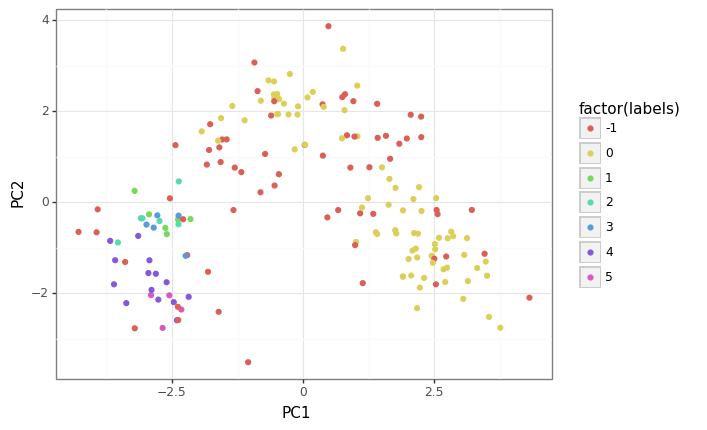

<ggplot: (306425457)>

In [4]:
#Creando el objeto y aplicando PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_features)
tempData = pca.transform(scaled_features)
tempData = pd.DataFrame(tempData,columns=["PC1","PC2"])
tempData["labels"]=DB.labels_
ggplot(tempData)+aes(x="PC1",y="PC2",color="factor(labels)")+geom_point()+theme_bw()

# clase NearestNeighbors
## Buscando eps

Para calcular las distancias de los vecinos se utiliza la clase sklearn.neighbors.NearestNeighbors<br>
NearestNeighbors(n_neighbors=5, metric='minkowski', p=2)<br>
Parámetros
* n_neighbors: Números de vecinos a estimar.
* metric: métrica para el cálculo de la distancia.
* p: parámetro de la distancia de minkowski (2 es euclideana). <br><br>

Atributos
* effective_metric_: métrica usada para el cálculo de la distancia.
* effective_metric_params_: Parámetros de la métrica usada para el cálculo de la distancia.
* n_samples_fit_: número de puntos del dataset.<br><br>

Funciones:
* fit(X): Encontrar los vecinos más cercanos de los datos.
* kneighbors(X, n_neighbors): Encontrar los K vecinos más cercano de un punto, retorna tanto los índices como la distancia.
* radius_neighbors(X, radius): Encontrar los vecinos de uno o más puntos que se encuentran dentro de un radio determinado.

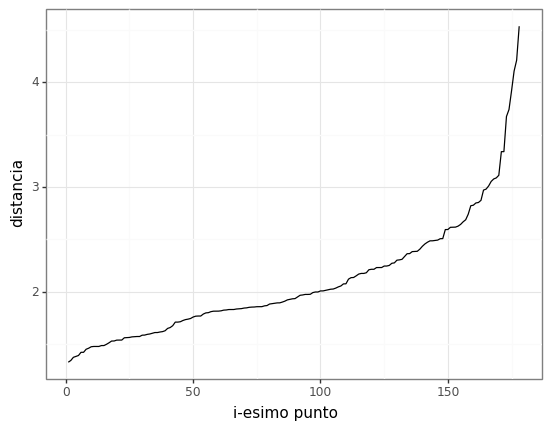

<ggplot: (307469453)>

In [5]:
from sklearn.neighbors import NearestNeighbors
numNeighboors=3
neighbors = NearestNeighbors(n_neighbors=numNeighboors) #Creando el modelo
neighbors_fit = neighbors.fit(scaled_features) #"Entrenando" el modelo
distances, indices = neighbors_fit.kneighbors(scaled_features) #"Buscando los vecinos más cercanos"
distances = distances[:,numNeighboors-1]
distances.sort()
distances

tempDataFrame=pd.DataFrame(range(1,len(distances)+1),columns=["puntos"])
tempDataFrame["dist"]=distances
(ggplot(tempDataFrame)
 +aes(x="puntos",y="dist")
 +theme_bw()
 +geom_line()
 +labs(y="distancia",x="i-esimo punto")
)

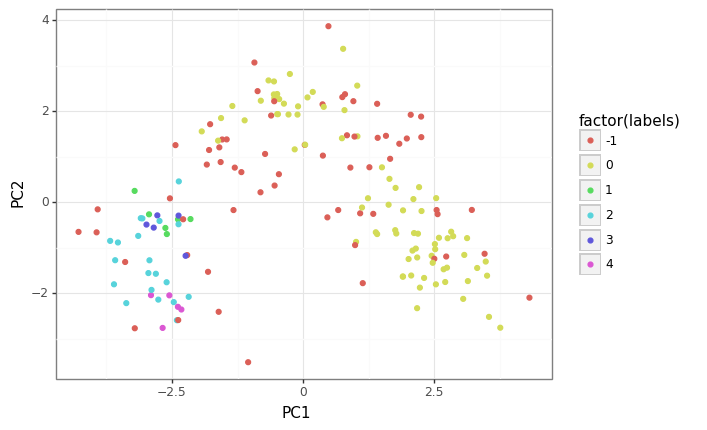

<ggplot: (309900745)>

In [6]:
#Creando un objeto de DBSCAN con las condiciones iniciales
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
DB = DBSCAN(eps=2.0, min_samples=3)
DB = DB.fit(scaled_features)
pca = PCA(n_components=2)
pca.fit(scaled_features)
tempData = pca.transform(scaled_features)
tempData = pd.DataFrame(tempData,columns=["PC1","PC2"])
tempData["labels"]=DB.labels_
ggplot(tempData)+aes(x="PC1",y="PC2",color="factor(labels)")+geom_point()+theme_bw()